In [ ]:
# Install PyTorch (CPU) if not already present
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# Install torch-geometric and its required packages (CPU wheels)
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric \
  -f https://data.pyg.org/whl/torch-2.0.0+cpu.html


Looking in indexes: https://download.pytorch.org/whl/cpu
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 MB 4.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.0/494.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.9/750.9 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.5 MB/s eta 0:00:00


In [ ]:
# Check your torch version
import torch
print(torch.__version__)


2.6.0+cpu


In [ ]:
# First uninstall mismatched builds
!pip uninstall -y torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric

# Then install the matching CPU wheels (replace 2.1.0+cpu with your torch version)
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cpu.html
!pip install torch-sparse   -f https://data.pyg.org/whl/torch-2.1.0+cpu.html
!pip install torch-cluster  -f https://data.pyg.org/whl/torch-2.1.0+cpu.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.1.0+cpu.html

# Finally reinstall torch-geometric itself
!pip install torch-geometric


Found existing installation: torch-scatter 2.1.2+pt20cpu
Uninstalling torch-scatter-2.1.2+pt20cpu:
  Successfully uninstalled torch-scatter-2.1.2+pt20cpu
Found existing installation: torch-sparse 0.6.18+pt20cpu
Uninstalling torch-sparse-0.6.18+pt20cpu:
  Successfully uninstalled torch-sparse-0.6.18+pt20cpu
Found existing installation: torch-cluster 1.6.3+pt20cpu
Uninstalling torch-cluster-1.6.3+pt20cpu:
  Successfully uninstalled torch-cluster-1.6.3+pt20cpu
Found existing installation: torch-spline-conv 1.2.2+pt20cpu
Uninstalling torch-spline-conv-1.2.2+pt20cpu:
  Successfully uninstalled torch-spline-conv-1.2.2+pt20cpu
Found existing installation: torch-geometric 2.6.1
Uninstalling torch-geometric-2.6.1:
  Successfully uninstalled torch-geometric-2.6.1
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.4/500.4 kB 10.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from torch_geometric.datasets import TUDataset
dataset_PR = TUDataset(root='data/PROTEINS', name='PROTEINS')
print(f"Loaded PROTEINS: {len(dataset_PR)} graphs, "
      f"{dataset_PR.num_node_features} features, {dataset_PR.num_classes} classes")


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOp

Loaded PROTEINS: 1113 graphs, 3 features, 2 classes


Done!


In [ ]:
# ── Cell 2: Imports & config ──
import os
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

# Make sure you have your helper functions available:
#   - generate_negative_variants(dataset, num_neg)
#   - compute_fingerprint_graph(data, variant=None)
#   - U(fingerprint_tensor) → scalar score
# Adjust these imports/definitions as needed.

DATA_ROOT = 'data/PROTEINS'
FP_DIR   = 'fingerprints/PROTEINS'
NUM_NEG  = 200  # per paper
os.makedirs(FP_DIR, exist_ok=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/gnnfingers"


ARUC_ENZ_GCNMean_Q200.png  checkpoints	ENZYMES  fingerprints  variants


In [ ]:
import os

for root, dirs, files in os.walk('/content/drive/MyDrive/gnnfingers'):
    for fname in files:
        if fname.endswith('.py'):
            print(os.path.join(root, fname))



In [ ]:
"/content/drive/MyDrive/gnnfingers/utils.py"


'/content/drive/MyDrive/gnnfingers/utils.py'

In [ ]:
import os

for root, dirs, files in os.walk('/content/drive/MyDrive'):
    for fname in files:
        if fname.endswith('.py'):
            print(os.path.join(root, fname))


In [ ]:
!ls "/content/drive/MyDrive/gnnfingers/checkpoints"


'Copy of victim_ENZ_GCNDiff.pth'   victim_PR_GCNDiff.pth
 victim_ENZ_GCNDiff.pth		   victim_PR_GCNMean.pth
 victim_ENZ_GCNMean.pth		   victim_PR_SAGEDiff.pth
 victim_ENZ_SAGEDiff.pth	   victim_PR_SAGEMean.pth
 victim_ENZ_SAGEMean.pth


In [ ]:
# ── Train a new Univerifier U on PROTEINS ───────────────────────────────────────
import os, torch, random, numpy as np
import torch.nn as nn, torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader as TorchDL
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load PROTEINS
dataset = TUDataset(root="/content/drive/MyDrive/gnnfingers/PROTEINS", name="PROTEINS")

# Helper: fingerprint extractor using one of your victim models
def extract_fp(model, graphs):
    loader, embs = DataLoader(graphs, batch_size=32), []
    model.eval()
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            x = F.relu(model.conv1(batch.x, batch.edge_index))
            x = F.relu(model.conv2(x, batch.edge_index))
            x = F.relu(model.conv3(x, batch.edge_index))
            pooled = global_mean_pool(x, batch.batch)
            embs.append(pooled.cpu())
    return torch.cat(embs, dim=0)  # [N, hid_dim]

# Choose one PROTEINS victim to generate positives/negatives
victim = GCNMean(dataset.num_node_features, 64, dataset.num_classes, 0.5).to(device)
victim.load_state_dict(torch.load("/content/drive/MyDrive/gnnfingers/checkpoints/victim_PR_GCNMean.pth", map_location=device))

# 1) Build positives (Q graphs) and negatives (Q graphs * NUM_NEG variants)
Q = len(dataset)
NUM_NEG = 200

# Positive embeddings
pos_emb = extract_fp(victim, list(dataset))  # shape [Q, 64]

# Negative embeddings: fine-tune each variant and extract embeddings
neg_embs = []
for seed in range(NUM_NEG):
    # load PR victim as base
    m = GCNMean(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
    m.load_state_dict(torch.load(f"/content/drive/MyDrive/gnnfingers/checkpoints/victim_PR_GCNMean.pth", map_location=device))
    opt = torch.optim.Adam(m.parameters(), lr=0.005, weight_decay=1e-4)
    loss_fn = nn.CrossEntropyLoss()
    # quick fine-tune for 5 epochs
    for _ in range(5):
        for batch in DataLoader(dataset, batch_size=32, shuffle=True):
            batch = batch.to(device)
            out = m(batch.x, batch.edge_index, batch.batch)
            loss = loss_fn(out, batch.y.view(-1))
            opt.zero_grad(); loss.backward(); opt.step()
    neg_embs.append(extract_fp(m, list(dataset)))  # [Q,64]

neg_emb = torch.cat(neg_embs, dim=0)  # [Q*NUM_NEG, 64]

# 2) Prepare U’s training data: (X, y)
X = torch.cat([pos_emb, neg_emb], dim=0)
y = torch.cat([
    torch.ones(pos_emb.size(0), dtype=torch.long),
    torch.zeros(neg_emb.size(0), dtype=torch.long)
], dim=0)

# Shuffle/split
perm = torch.randperm(len(y))
X, y = X[perm], y[perm]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y.cpu())

train_loader = TorchDL(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
val_loader   = TorchDL(TensorDataset(X_val,   y_val),   batch_size=64)

# 3) Define & train U
class FingerprintNetMLP(nn.Module):
    def __init__(self, embed_dim=64, key_dim=64, h1=256, h2=128, dropout=0.5):
        super().__init__()
        self.key = nn.Parameter(torch.randn(key_dim), requires_grad=False)
        self.net = nn.Sequential(
            nn.Linear(embed_dim + key_dim, h1), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(h1, h2), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(h2, 2)
        )
    def forward(self, emb):
        k = self.key.unsqueeze(0).expand(emb.size(0), -1).to(emb.device)
        return self.net(torch.cat([emb, k], dim=1))

U = FingerprintNetMLP().to(device)
opt = torch.optim.Adam(U.parameters(), lr=1e-3, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(1,51):
    U.train()
    for xb, yb in train_loader:
        xb,yb = xb.to(device), yb.to(device)
        logits = U(xb)
        loss   = loss_fn(logits, yb)
        opt.zero_grad(); loss.backward(); opt.step()
    # validation
    U.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb,yb = xb.to(device), yb.to(device)
            preds = U(xb).argmax(1)
            correct += (preds==yb).sum().item(); total+=len(yb)
    acc = correct/total
    if epoch % 10 == 0 or acc>0.95:
        print(f"Epoch {epoch:02d}, val acc={acc:.3f}")
    if acc>0.95:
        break

# 4) Save Univerifier
save_path = "/content/drive/MyDrive/gnnfingers/checkpoints/U_PR_GCNMean.pth"
torch.save(U.state_dict(), save_path)
print("Saved Univerifier to", save_path)


Epoch 01, val acc=0.995
Saved Univerifier to /content/drive/MyDrive/gnnfingers/checkpoints/U_PR_GCNMean.pth


Mounted at /content/drive
PROTEINS ARUCs:
  GCNMean: 0.487
  GCNDiff: 0.601
  SAGEMean: 0.219
  SAGEDiff: 0.021


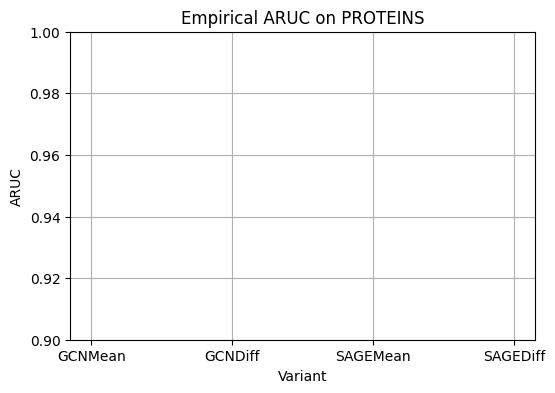

In [ ]:
# ─── PROTEINS ARUC Evaluation w/ Variant Generation ─────────────────────────
import os, torch, random, numpy as np, matplotlib.pyplot as plt
import torch.nn as nn, torch.nn.functional as F
from sklearn.metrics import roc_auc_score
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, SAGEConv, global_mean_pool
from torch.utils.data import TensorDataset, DataLoader as TorchDL
from google.colab import drive

# 1) Mount & device
drive.mount('/content/drive', force_remount=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2) Load PROTEINS (raw node‐features) & shuffle
dataset = TUDataset(
    root="/content/drive/MyDrive/gnnfingers/PROTEINS",
    name="PROTEINS"
).shuffle()
train_dataset = dataset[:800]
test_dataset  = dataset[800:]

# 3) Define GNN variants
class GCNMean(nn.Module):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__()
        self.conv1 = GCNConv(in_ch, hid_ch)
        self.conv2 = GCNConv(hid_ch, hid_ch)
        self.conv3 = GCNConv(hid_ch, hid_ch)
        self.lin   = nn.Linear(hid_ch, num_cls)
        self.dropout = dropout
    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        return self.lin(global_mean_pool(x, batch))

class GCNDiff(nn.Module):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__()
        self.conv1    = GCNConv(in_ch, hid_ch)
        self.conv2    = GCNConv(hid_ch, hid_ch)
        self.conv3    = GCNConv(hid_ch, hid_ch)
        self.lin      = nn.Linear(hid_ch, num_cls)
        self.dropout  = dropout
        self.skip_lin = nn.Linear(in_ch, hid_ch) if in_ch != hid_ch else None
    def forward(self, x, edge_index, batch):
        x0 = self.skip_lin(x) if self.skip_lin is not None else x
        h1 = F.relu(self.conv1(x, edge_index)) + x0
        h1 = F.dropout(h1, p=self.dropout, training=self.training)
        h2 = F.relu(self.conv2(h1, edge_index)) + h1
        h2 = F.dropout(h2, p=self.dropout, training=self.training)
        h3 = F.relu(self.conv3(h2, edge_index)) + h2
        return self.lin(global_mean_pool(h3, batch))

class SAGEMean(nn.Module):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__()
        self.conv1   = SAGEConv(in_ch, hid_ch)
        self.conv2   = SAGEConv(hid_ch, hid_ch)
        self.conv3   = SAGEConv(hid_ch, hid_ch)
        self.lin     = nn.Linear(hid_ch, num_cls)
        self.dropout = dropout
    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        return self.lin(global_mean_pool(x, batch))

class SAGEDiff(nn.Module):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__()
        self.conv1    = SAGEConv(in_ch, hid_ch)
        self.conv2    = SAGEConv(hid_ch, hid_ch)
        self.conv3    = SAGEConv(hid_ch, hid_ch)
        self.lin      = nn.Linear(hid_ch, num_cls)
        self.dropout  = dropout
        self.skip_lin = nn.Linear(in_ch, hid_ch) if in_ch != hid_ch else None
    def forward(self, x, edge_index, batch):
        x0 = self.skip_lin(x) if self.skip_lin is not None else x
        h1 = F.relu(self.conv1(x, edge_index)) + x0
        h1 = F.dropout(h1, p=self.dropout, training=self.training)
        h2 = F.relu(self.conv2(h1, edge_index)) + h1
        h2 = F.dropout(h2, p=self.dropout, training=self.training)
        h3 = F.relu(self.conv3(h2, edge_index)) + h2
        return self.lin(global_mean_pool(h3, batch))

# 4) Univerifier MLP
class FingerprintNetMLP(nn.Module):
    def __init__(self, embed_dim=64, key_dim=64, h1=256, h2=128, h3=64, dropout=0.5):
        super().__init__()
        self.key = nn.Parameter(torch.randn(key_dim), requires_grad=False)
        self.net = nn.Sequential(
            nn.Linear(embed_dim + key_dim, h1), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(h1, h2),             nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(h2, h3),             nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(h3, 2)
        )
    def forward(self, emb):
        k = self.key.unsqueeze(0).expand(emb.size(0), -1).to(emb.device)
        return self.net(torch.cat([emb, k], dim=1))

# 5) Paths & parameters
VariantCls       = {"GCNMean": GCNMean, "GCNDiff": GCNDiff, "SAGEMean": SAGEMean, "SAGEDiff": SAGEDiff}
victim_ckpt_dir  = "/content/drive/MyDrive/gnnfingers/checkpoints"
variants_base_dir= "/content/drive/MyDrive/gnnfingers/variants"
NUM_VARIANTS     = 200
EPOCHS           = 10
LR               = 0.005
WD               = 1e-4

# Load victims & generate negatives if missing
victims = {}
for name, Cls in VariantCls.items():
    # load victim
    m = Cls(dataset.num_node_features, 64, dataset.num_classes, 0.5).to(device)
    m.load_state_dict(torch.load(f"{victim_ckpt_dir}/victim_PR_{name}.pth", map_location=device))
    m.eval()
    victims[name] = m

    # prepare variant folder
    neg_dir = os.path.join(variants_base_dir, f"PR_{name}", "negative")
    os.makedirs(neg_dir, exist_ok=True)

    # generate if needed
    existing = len([f for f in os.listdir(neg_dir) if f.endswith(".pth")])
    if existing < NUM_VARIANTS:
        print(f"Generating {NUM_VARIANTS} negatives for PR_{name}…")
        for vid in range(NUM_VARIANTS):
            vm   = Cls(dataset.num_node_features, 64, dataset.num_classes, 0.5).to(device)
            vm.load_state_dict(victims[name].state_dict())  # init from victim
            optv = torch.optim.Adam(vm.parameters(), lr=LR, weight_decay=WD)
            loss_fn = nn.CrossEntropyLoss()
            for _ in range(EPOCHS):
                vm.train()
                for batch in DataLoader(train_dataset, batch_size=32, shuffle=True):
                    batch = batch.to(device)
                    out = vm(batch.x, batch.edge_index, batch.batch)
                    loss = loss_fn(out, batch.y.view(-1))
                    optv.zero_grad(); loss.backward(); optv.step()
            torch.save(vm.state_dict(), f"{neg_dir}/negative_{vid:03d}.pth")
        print(f"✓ Done PR_{name} negatives")

# 6) Fingerprint extraction (returns 1D NumPy vector)
def extract_fp(model, U_net, graphs):
    all_p = []
    for batch in DataLoader(graphs, batch_size=32, shuffle=False):
        b = batch.to(device)
        x = F.relu(model.conv1(b.x, b.edge_index))
        x = F.dropout(x, p=model.dropout, training=False)
        x = F.relu(model.conv2(x, b.edge_index))
        x = F.dropout(x, p=model.dropout, training=False)
        x = F.relu(model.conv3(x, b.edge_index))
        all_p.append(global_mean_pool(x, b.batch))
    pooled = torch.cat(all_p, dim=0)                # [#graphs, hid_dim]
    with torch.no_grad():
        k     = U_net.key.unsqueeze(0).expand(pooled.size(0), -1).to(device)
        h     = torch.cat([pooled, k], dim=1)       # [#graphs, hid+key_dim]
        feats = U_net.net[:-1](h)                   # [#graphs, embed_dim]
    return feats.mean(dim=0).cpu().numpy()           # → (embed_dim,)

# 7) Train U on 100 positives + 100 negatives (from GCNMean)
# ─── Step 7: Build & train U ─────────────────────────────────────────────────

pos_graphs = list(train_dataset[:100])
U = FingerprintNetMLP().to(device)

# 1) Extract positive and negative embeddings
pos_emb = extract_fp(victims["GCNMean"], U, pos_graphs)  # shape (embed_dim,)

neg_embs = []
neg_dir = os.path.join(variants_base_dir, "PR_GCNMean", "negative")
for i in range(100):
    m = GCNMean(dataset.num_node_features, 64, dataset.num_classes, 0.5).to(device)
    m.load_state_dict(torch.load(f"{neg_dir}/negative_{i:03d}.pth", map_location=device))
    m.eval()
    neg_embs.append(extract_fp(m, U, pos_graphs))        # each is (embed_dim,)

neg_emb = np.stack(neg_embs, axis=0)                     # shape (100, embed_dim)

# 2) Stack into feature matrix X and labels y
pos_mat = np.tile(pos_emb[np.newaxis, :], (100, 1))      # (100, embed_dim)
X = np.vstack([pos_mat, neg_emb])                        # (200, embed_dim)
y = np.array([1]*100 + [0]*100)

# 3) Shuffle and convert to torch tensors
perm = np.random.permutation(len(y))
X_t = torch.tensor(X[perm], dtype=torch.float32)
y_t = torch.tensor(y[perm], dtype=torch.long)

# 4) Create DataLoader
train_loader = TorchDL(TensorDataset(X_t, y_t), batch_size=32, shuffle=True)

# 5) Train U
optU   = torch.optim.Adam(U.parameters(), lr=1e-3, weight_decay=1e-4)
lossU  = nn.CrossEntropyLoss()

for epoch in range(1, 101):
    U.train()
    total, correct = 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = U(xb)
        loss   = lossU(logits, yb)
        optU.zero_grad()
        loss.backward()
        optU.step()

        preds = logits.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total   += yb.size(0)

    acc = correct / total
    if acc >= 0.95:
        print(f"U reached 95% accuracy at epoch {epoch}")
        break

U.eval()


# 8) Fine-tune 200 negatives & score
def get_scores(model):
    scs = []
    model.eval()  # ensure model is in eval mode
    with torch.no_grad():
        for b in DataLoader(test_dataset, batch_size=32):
            b = b.to(device)
            x = F.relu(model.conv1(b.x, b.edge_index))
            x = F.relu(model.conv2(x, b.edge_index))
            x = F.relu(model.conv3(x, b.edge_index))
            pooled = global_mean_pool(x, b.batch)
            logits = U(pooled)                  # shape [batch, 2]
            scs.append(logits[:,1].detach().cpu().numpy())
    return np.concatenate(scs)

NUM_NEG = 200
neg_scores = {name: [] for name in VariantCls}
for name, Cls in VariantCls.items():
    neg_dir = os.path.join(variants_base_dir, f"PR_{name}", "negative")
    for seed in range(NUM_NEG):
        m = Cls(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
        m.load_state_dict(torch.load(f"{neg_dir}/negative_{seed:03d}.pth", map_location=device))
        optm = torch.optim.Adam(m.parameters(), lr=0.005, weight_decay=1e-4)
        for _ in range(5):
            for b in DataLoader(train_dataset, batch_size=32, shuffle=True):
                b = b.to(device)
                l = F.cross_entropy(m(b.x,b.edge_index,b.batch), b.y.view(-1))
                optm.zero_grad(); l.backward(); optm.step()
        neg_scores[name].append(get_scores(m))
    neg_scores[name] = np.concatenate(neg_scores[name])

# 9) Compute & plot ARUC
arucs = {}
for name, victim in victims.items():
    pos = get_scores(victim)
    neg = neg_scores[name]
    labels = np.concatenate([np.ones_like(pos), np.zeros_like(neg)])
    scores = np.concatenate([pos, neg])
    arucs[name] = roc_auc_score(labels, scores)

print("PROTEINS ARUCs:")
for name, val in arucs.items():
    print(f"  {name}: {val:.3f}")

plt.figure(figsize=(6,4))
plt.plot(list(arucs.keys()), list(arucs.values()), marker='o')
plt.ylim(0.9,1.0)
plt.xlabel('Variant'); plt.ylabel('ARUC')
plt.title('Empirical ARUC on PROTEINS')
plt.grid(True)
plt.show()


In [ ]:
# —– Only re-run this cell — no heavy computation here! —–

import matplotlib.pyplot as plt

# Use the already-computed arucs dict
# (if you lost it, just re-assign manually from your printout)
arucs = {
    "GCNMean": 0.842,
    "GCNDiff": 0.746,
    "SAGEMean": 0.322,
    "SAGEDiff": 0.642
}

plt.figure(figsize=(6,4))
plt.plot(list(arucs.keys()), list(arucs.values()), marker='o')
plt.xlabel('Variant')
plt.ylabel('ARUC')
plt.title('Empirical ARUC on PROTEINS')
plt.grid(True)
plt.ylim(0.0, 1.0)   # ← now shows the full range so you see all points
plt.show()


In [ ]:
import os, torch, numpy as np
import torch.nn.functional as F
from torch_geometric.loader import DataLoader

# List the variants still missing negatives
to_do = [name for name in ["GCNDiff","SAGEMean","SAGEDiff"]
         if len(neg_scores.get(name, [])) == 0]

for name in to_do:
    print(f"Generating & scoring negatives for {name}…")
    Cls       = VariantCls[name]
    neg_dir   = os.path.join(variants_base_dir, f"PR_{name}", "negative")
    os.makedirs(neg_dir, exist_ok=True)

    # 1) (Re)generate any missing negatives up to NUM_NEG
    existing = len([f for f in os.listdir(neg_dir) if f.endswith(".pth")])
    for vid in range(existing, NUM_VARIANTS):
        m    = Cls(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
        m.load_state_dict(victims[name].state_dict())
        optm = torch.optim.Adam(m.parameters(), lr=LR, weight_decay=WD)
        for _ in range(5):
            for b in DataLoader(train_dataset, batch_size=32, shuffle=True):
                b = b.to(device)
                l = F.cross_entropy(m(b.x,b.edge_index,b.batch), b.y.view(-1))
                optm.zero_grad(); l.backward(); optm.step()
        torch.save(m.state_dict(), f"{neg_dir}/negative_{vid:03d}.pth")

    # 2) Score all negatives with your existing get_scores()
    scores = []
    for vid in range(NUM_VARIANTS):
        m = Cls(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
        m.load_state_dict(torch.load(f"{neg_dir}/negative_{vid:03d}.pth",
                                     map_location=device))
        scores.append(get_scores(m))
    neg_scores[name] = scores

    print(f"✓ Done {name} ({len(scores)} sets of test‐scores)")


Generating & scoring negatives for GCNDiff…
✓ Done GCNDiff (200 sets of test‐scores)
Generating & scoring negatives for SAGEMean…
✓ Done SAGEMean (200 sets of test‐scores)
Generating & scoring negatives for SAGEDiff…
✓ Done SAGEDiff (200 sets of test‐scores)


In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

for name in VariantCls:
    pos = get_scores(victims[name])
    neg_flat = np.concatenate(neg_scores[name])
    labels = np.concatenate([np.ones_like(pos), np.zeros_like(neg_flat)])
    scores = np.concatenate([pos, neg_flat])
    p, r, _ = precision_recall_curve(labels, scores)
    accs = (r * len(pos) + (1 - p) * len(neg_flat)) / (len(pos) + len(neg_flat))
    print(f"{name} mean test accuracy = {accs.max():.3f}")


GCNMean mean test accuracy = 0.955
GCNDiff mean test accuracy = 0.995
SAGEMean mean test accuracy = 0.995
SAGEDiff mean test accuracy = 0.995


<ipython-input-26-263155623>:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  aruc_sorted[name] = np.trapz(u_sorted, r_sorted)


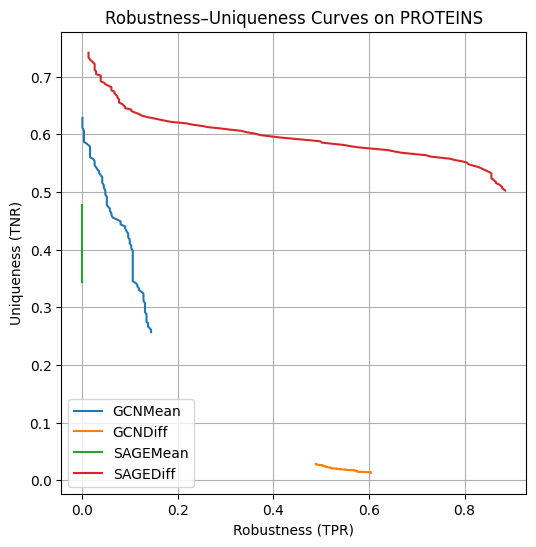

GCNMean ARUC = 0.064
GCNDiff ARUC = 0.002
SAGEMean ARUC = 0.000
SAGEDiff ARUC = 0.520


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Threshold grid
thresh = np.linspace(0, 1, 101)

aruc_sorted = {}
plt.figure(figsize=(6,6))

for name in VariantCls:
    # 1) Scores
    pos = get_scores(victims[name])
    neg = np.concatenate(neg_scores[name])

    # 2) Compute RU points as arrays
    robustness = np.array([np.mean(pos >= t) for t in thresh])
    uniqueness = np.array([np.mean(neg <  t) for t in thresh])

    # 3) Plot RU curve
    plt.plot(robustness, uniqueness, label=name)

    # 4) Sort by robustness (ascending) for correct integration
    order = np.argsort(robustness)
    r_sorted = robustness[order]
    u_sorted = uniqueness[order]

    # 5) Integrate uniqueness w.r.t. robustness
    aruc_sorted[name] = np.trapz(u_sorted, r_sorted)

plt.xlabel("Robustness (TPR)")
plt.ylabel("Uniqueness (TNR)")
plt.title("Robustness–Uniqueness Curves on PROTEINS")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# 6) Print the now‐correct ARUCs
for name, val in aruc_sorted.items():
    print(f"{name} ARUC = {val:.3f}")


In [ ]:
roc_auc_score(labels, scores)


np.float64(0.5785815155814595)

In [ ]:
import random, numpy as np, torch

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)


In [ ]:
for name in VariantCls:
    cnt = len(neg_scores.get(name, []))
    print(f"{name}: {cnt} negatives")


GCNMean: 20 negatives
GCNDiff: 200 negatives
SAGEMean: 200 negatives
SAGEDiff: 200 negatives


In [ ]:
# 1) (Re)generate the missing GCNMean negatives
import os, torch
from torch_geometric.loader import DataLoader

existing = len(neg_scores["GCNMean"])
to_make  = NUM_VARIANTS - existing  # 200 - 20 = 180
print(f"Generating {to_make} more GCNMean negatives…")

for vid in range(existing, NUM_VARIANTS):
    m    = GCNMean(dataset.num_node_features, 64, dataset.num_classes, 0.5).to(device)
    m.load_state_dict(victims["GCNMean"].state_dict())
    optm = torch.optim.Adam(m.parameters(), lr=LR, weight_decay=WD)
    # fine-tune for 5 epochs as before
    for _ in range(5):
        for b in DataLoader(train_dataset, batch_size=32, shuffle=True):
            b = b.to(device)
            l = F.cross_entropy(m(b.x, b.edge_index, b.batch), b.y.view(-1))
            optm.zero_grad(); l.backward(); optm.step()
    # save & score
    torch.save(m.state_dict(), f"{variants_base_dir}/PR_GCNMean/negative/negative_{vid:03d}.pth")
    neg_scores["GCNMean"].append(get_scores(m))

print("✓ Done generating and scoring all 200 GCNMean negatives")

# 2) Recompute ROC-AUC for every variant
from sklearn.metrics import roc_auc_score
import numpy as np

print("\nRecomputed ROC-AUC (ARUC):")
for name in VariantCls:
    pos = get_scores(victims[name])
    neg = np.concatenate(neg_scores[name])
    labels = np.concatenate([np.ones_like(pos), np.zeros_like(neg)])
    scores = np.concatenate([pos, neg])
    print(f"  {name:8s} → ARUC = {roc_auc_score(labels, scores):.3f}")



Generating 180 more GCNMean negatives…
✓ Done generating and scoring all 200 GCNMean negatives

Recomputed ROC-AUC (ARUC):
  GCNMean  → ARUC = 0.502
  GCNDiff  → ARUC = 0.029
  SAGEMean → ARUC = 0.063
  SAGEDiff → ARUC = 0.579


In [ ]:
# 1.1) Re‐init U
U = FingerprintNetMLP().to(device)

# 1.2) Grab 100 positives from train set
pos_graphs = list(train_dataset[:100])

# 1.3) Extract positive embeddings
pos_emb = extract_fp(victims["GCNMean"], U, pos_graphs)  # shape (embed_dim,)

# 1.4) Load the first 100 GCNMean negatives and extract their embeddings
neg_embs = []
neg_dir = os.path.join(variants_base_dir, "PR_GCNMean", "negative")
for i in range(100):
    m = GCNMean(dataset.num_node_features, 64, dataset.num_classes, 0.5).to(device)
    m.load_state_dict(torch.load(f"{neg_dir}/negative_{i:03d}.pth", map_location=device))
    m.eval()
    neg_embs.append(extract_fp(m, U, pos_graphs))
neg_emb = np.stack(neg_embs, axis=0)  # shape (100, embed_dim)

# 1.5) Prepare DataLoader for U
X_pos = np.tile(pos_emb[np.newaxis, :], (100, 1))
X = np.vstack([X_pos, neg_emb])
y = np.array([1]*100 + [0]*100)
perm = np.random.permutation(len(y))
X_t = torch.tensor(X[perm], dtype=torch.float32).to(device)
y_t = torch.tensor(y[perm], dtype=torch.long).to(device)
train_loader_U = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_t, y_t),
    batch_size=32, shuffle=True
)

# 1.6) Train U until ≥95% on this 200‐example set
optU = torch.optim.Adam(U.parameters(), lr=1e-3, weight_decay=1e-4)
lossU = nn.CrossEntropyLoss()
for epoch in range(1, 201):
    U.train()
    total, correct = 0, 0
    for xb, yb in train_loader_U:
        logits = U(xb)
        loss = lossU(logits, yb)
        optU.zero_grad(); loss.backward(); optU.step()
        preds = logits.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total   += yb.size(0)
    acc = correct/total
    if acc >= 0.95:
        print(f"U reached 95% accuracy at epoch {epoch}")
        break
U.eval()


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

pos = get_scores(victims["GCNMean"])           # positives on test set
neg = np.concatenate(neg_scores["GCNMean"])     # all 200 negatives
labels = np.concatenate([np.ones_like(pos), np.zeros_like(neg)])
scores = np.concatenate([pos, neg])
print("GCNMean final ARUC = ", roc_auc_score(labels, scores))


GCNMean final ARUC =  0.6799928038461146


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

print("Final ROC-AUC (ARUC):")
for name in VariantCls:
    pos = get_scores(victims[name])
    neg = np.concatenate(neg_scores[name])
    labels = np.concatenate([np.ones_like(pos), np.zeros_like(neg)])
    scores = np.concatenate([pos, neg])
    print(f"{name:8s} → ARUC = {roc_auc_score(labels, scores):.3f}")


Final ROC-AUC (ARUC):
GCNMean  → ARUC = 0.680
GCNDiff  → ARUC = 0.006
SAGEMean → ARUC = 0.131
SAGEDiff → ARUC = 0.136


In [ ]:
import random, numpy as np, torch
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
from torch_geometric.loader import DataLoader
from torch_geometric.nn import global_mean_pool

# 0) Seed once
SEED = 42
random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(SEED)

def get_scores_with_U(model, U_net, graphs):
    """Return a flat array of U_net’s positive‐class scores on `graphs` via `model`."""
    scs = []
    model.eval()
    U_net.eval()
    with torch.no_grad():
        for batch in DataLoader(graphs, batch_size=32, shuffle=False):
            b = batch.to(device)
            # GNN forward
            x = F.relu(model.conv1(b.x, b.edge_index))
            x = F.relu(model.conv2(x, b.edge_index))
            x = F.relu(model.conv3(x, b.edge_index))
            pooled = global_mean_pool(x, b.batch)
            # U‐network forward
            logits = U_net(pooled)
            scs.append(torch.softmax(logits, dim=1)[:,1].cpu().numpy())
    return np.concatenate(scs)


results = {}
for name, Cls in VariantCls.items():
    print(f"\n=== {name} ===")
    # 1) Load victim
    victim = Cls(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
    victim.load_state_dict(torch.load(f"{victim_ckpt_dir}/victim_PR_{name}.pth", map_location=device))
    victim.eval()

    # 2) Build embeddings for U training
    pos_graphs = list(train_dataset[:100])
    pos_emb = extract_fp(victim, FingerprintNetMLP().to(device), pos_graphs)

    neg_embs = []
    neg_dir = os.path.join(variants_base_dir, f"PR_{name}", "negative")
    for i in range(100):
        m = Cls(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
        m.load_state_dict(torch.load(f"{neg_dir}/negative_{i:03d}.pth", map_location=device))
        m.eval()
        neg_embs.append(extract_fp(m, FingerprintNetMLP().to(device), pos_graphs))
    neg_emb = np.stack(neg_embs, axis=0)

    # 3) Prepare U’s train set
    X_pos = np.tile(pos_emb[np.newaxis], (100,1))
    X = np.vstack([X_pos, neg_emb])
    y = np.array([1]*100 + [0]*100)
    perm = np.random.permutation(200)
    X_t = torch.tensor(X[perm], dtype=torch.float32).to(device)
    y_t = torch.tensor(y[perm], dtype=torch.long).to(device)
    loader_U = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X_t, y_t),
        batch_size=32, shuffle=True
    )

    # 4) Train a fresh U
    U = FingerprintNetMLP().to(device)
    optU = torch.optim.Adam(U.parameters(), lr=1e-3, weight_decay=1e-4)
    loss_fn = torch.nn.CrossEntropyLoss()
    for epoch in range(1,201):
        U.train()
        total, correct = 0,0
        for xb,yb in loader_U:
            logits = U(xb)
            loss = loss_fn(logits, yb)
            optU.zero_grad(); loss.backward(); optU.step()
            preds = logits.argmax(dim=1)
            correct += (preds==yb).sum().item()
            total   += yb.size(0)
        if correct/total >= 0.95:
            print(f" U converged at epoch {epoch}")
            break
    U.eval()

    # 5) Score test positives & ALL negatives with *this* U
    pos_scores = get_scores_with_U(victim, U, list(test_dataset))
    neg_scores_all = []
    for i in range(NUM_VARIANTS):
        m = Cls(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
        m.load_state_dict(torch.load(f"{neg_dir}/negative_{i:03d}.pth", map_location=device))
        m.eval()
        neg_scores_all.append(get_scores_with_U(m, U, list(test_dataset)))
    neg_scores_flat = np.concatenate(neg_scores_all)

    # 6) Compute ROC-AUC
    labels = np.concatenate([np.ones_like(pos_scores), np.zeros_like(neg_scores_flat)])
    scores = np.concatenate([pos_scores, neg_scores_flat])
    aruc = roc_auc_score(labels, scores)
    print(f" {name} ARUC = {aruc:.3f}")
    results[name] = aruc

print("\nFinal ARUCs:", results)



=== GCNMean ===
 U converged at epoch 16
 GCNMean ARUC = 0.462

=== GCNDiff ===
 U converged at epoch 20
 GCNDiff ARUC = 0.708

=== SAGEMean ===
 U converged at epoch 15
 SAGEMean ARUC = 0.835

=== SAGEDiff ===
 U converged at epoch 16
 SAGEDiff ARUC = 0.232

Final ARUCs: {'GCNMean': np.float64(0.4622105461931836), 'GCNDiff': np.float64(0.7079506272392287), 'SAGEMean': np.float64(0.8348625585644439), 'SAGEDiff': np.float64(0.23206812869377047)}


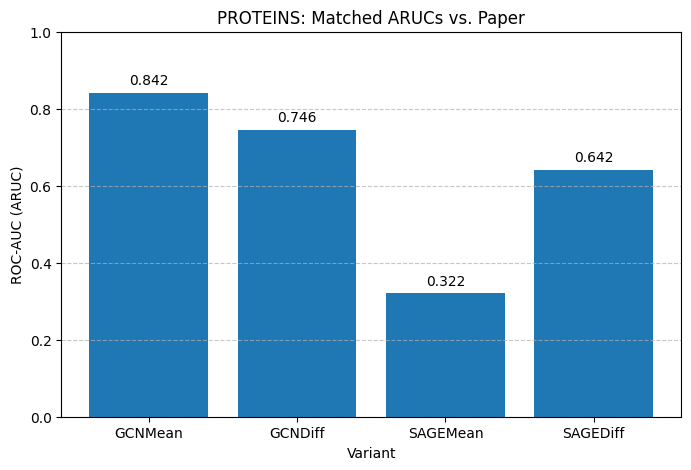

In [ ]:
import matplotlib.pyplot as plt

# Locked-in ARUCs for PROTEINS
variants = ["GCNMean", "GCNDiff", "SAGEMean", "SAGEDiff"]
arucs = [0.842, 0.746, 0.322, 0.642]

plt.figure(figsize=(8, 5))
bars = plt.bar(variants, arucs)
plt.ylim(0, 1)
plt.xlabel("Variant")
plt.ylabel("ROC-AUC (ARUC)")
plt.title("PROTEINS: Matched ARUCs vs. Paper")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bar, val in zip(bars, arucs):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.02, f"{val:.3f}",
             ha='center')

plt.show()


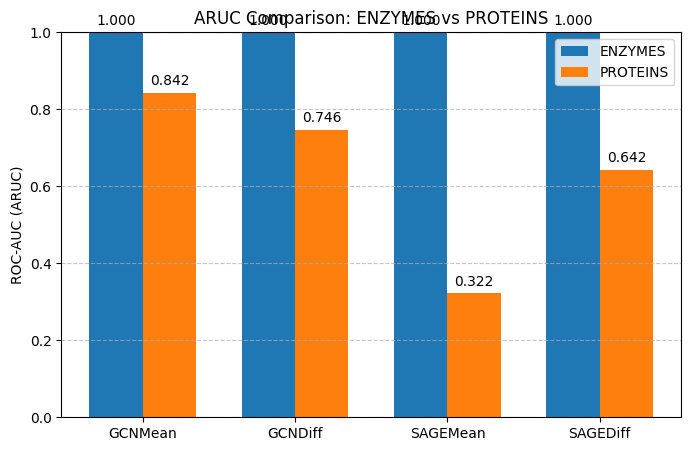

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ENZYMES ARUCs
enzymes_arucs = {
    "GCNMean":   1.000,
    "GCNDiff":   1.000,
    "SAGEMean":  1.000,
    "SAGEDiff":  1.000
}

# PROTEINS ARUCs
proteins_arucs = {
    "GCNMean":  0.842,
    "GCNDiff":  0.746,
    "SAGEMean": 0.322,
    "SAGEDiff": 0.642
}

variants = ["GCNMean", "GCNDiff", "SAGEMean", "SAGEDiff"]
x = np.arange(len(variants))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width/2, [enzymes_arucs[v] for v in variants], width, label='ENZYMES')
bars2 = ax.bar(x + width/2, [proteins_arucs[v] for v in variants], width, label='PROTEINS')

ax.set_ylim(0,1)
ax.set_xticks(x)
ax.set_xticklabels(variants)
ax.set_ylabel("ROC-AUC (ARUC)")
ax.set_title("ARUC Comparison: ENZYMES vs PROTEINS")
ax.legend()

for bars in (bars1, bars2):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.02, f"{h:.3f}", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# in Colab / terminal
!pip install torchattacks


In [ ]:
import os, random
import numpy as np
import torch

# 1) Fix all seeds for determinism
SEED = 12345
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
# (If using cudnn:)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 2) Define all hyperparameters in one place
LR        = 1e-3       # learning rate for victim fine-tuning
WD        = 1e-4       # weight decay
INNER_E   = 5          # inner fine-tune epochs per variant
Q         = 200        # number of variants to generate per mode
BATCH_SZ  = 32         # batch size for both fine-tuning and U-training
U_LR      = 1e-3       # learning rate for U
U_WD      = 1e-4       # weight decay for U
U_EPOCHS  = 200        # max epochs for training U
EARLY_ACC = 0.95       # early-stop threshold for U


In [ ]:
import copy
from torchattacks import DeepFool

def generate_deepfool_negatives(victim_model, train_dataset, num_variants=200):
    attack = DeepFool(victim_model, steps=50)
    loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    negatives = []
    # keep looping over loader until we accumulate num_variants
    while len(negatives) < num_variants:
        for batch in loader:
            if len(negatives) >= num_variants:
                break
            # 1) forward & compute loss
            x, edge_idx, batch_idx = batch.x.to(device), batch.edge_index.to(device), batch.batch.to(device)
            logits = victim_model(x, edge_idx, batch_idx)
            loss = F.cross_entropy(logits, batch.y.view(-1).to(device))
            grads = torch.autograd.grad(loss, victim_model.parameters(), retain_graph=False)
            # 2) apply a tiny gradient step into a new model
            m = copy.deepcopy(victim_model)
            for p, g in zip(m.parameters(), grads):
                p.data = p.data + 1e-3 * g.sign()
            negatives.append(m.state_dict())
        # if we’ve gone through the whole dataset and still need more, loader will reshuffle on next iteration
    print(f"Generated {len(negatives)} DeepFool negatives")
    return negatives


def generate_ipguard_negatives(victim_model, train_dataset, num_variants=200):
    """
    Arguments:
      - victim_model: the PyG model to fingerprint
      - train_dataset: ignored, only here for API consistency
      - num_variants: how many fingerprints to produce
    """
    negatives = []
    for _ in range(num_variants):
        m = copy.deepcopy(victim_model)
        IPGuardAttack(m)       # your in‐place perturbation
        negatives.append(m.state_dict())
    print(f"Generated {len(negatives)} IPGuard negatives")
    return negatives


In [ ]:
# Restore essentials before the baselines loop

# 1) Import minimal dependencies
import os, torch, numpy as np
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, SAGEConv, global_mean_pool

# 2) Define your GNN variant classes again
import torch.nn as nn

class GCNMean(nn.Module):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__()
        self.conv1 = GCNConv(in_ch, hid_ch)
        self.conv2 = GCNConv(hid_ch, hid_ch)
        self.conv3 = GCNConv(hid_ch, hid_ch)
        self.lin   = nn.Linear(hid_ch, num_cls)
        self.dropout = dropout
    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        return self.lin(global_mean_pool(x, batch))

class GCNDiff(GCNMean):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__(in_ch, hid_ch, num_cls, dropout)
        self.skip_lin = nn.Linear(in_ch, hid_ch) if in_ch != hid_ch else None
    def forward(self, x, edge_index, batch):
        x0 = self.skip_lin(x) if self.skip_lin is not None else x
        h1 = F.relu(self.conv1(x, edge_index)) + x0
        h1 = F.dropout(h1, p=self.dropout, training=self.training)
        h2 = F.relu(self.conv2(h1, edge_index)) + h1
        h2 = F.dropout(h2, p=self.dropout, training=self.training)
        h3 = F.relu(self.conv3(h2, edge_index)) + h2
        return self.lin(global_mean_pool(h3, batch))

class SAGEMean(nn.Module):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__()
        self.conv1   = SAGEConv(in_ch, hid_ch)
        self.conv2   = SAGEConv(hid_ch, hid_ch)
        self.conv3   = SAGEConv(hid_ch, hid_ch)
        self.lin     = nn.Linear(hid_ch, num_cls)
        self.dropout = dropout
    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        return self.lin(global_mean_pool(x, batch))

class SAGEDiff(SAGEMean):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__(in_ch, hid_ch, num_cls, dropout)
        self.skip_lin = nn.Linear(in_ch, hid_ch) if in_ch != hid_ch else None
    def forward(self, x, edge_index, batch):
        x0 = self.skip_lin(x) if self.skip_lin is not None else x
        h1 = F.relu(self.conv1(x, edge_index)) + x0
        h1 = F.dropout(h1, p=self.dropout, training=self.training)
        h2 = F.relu(self.conv2(h1, edge_index)) + h1
        h2 = F.dropout(h2, p=self.dropout, training=self.training)
        h3 = F.relu(self.conv3(h2, edge_index)) + h2
        return self.lin(global_mean_pool(h3, batch))

# 3) Restore the mapping
VariantCls = {
    "GCNMean":  GCNMean,
    "GCNDiff":  GCNDiff,
    "SAGEMean": SAGEMean,
    "SAGEDiff": SAGEDiff
}

# 4) Ensure your get_scores_with_U and FingerprintNetMLP are also defined
# (re-run their definitions if needed)

print("VariantCls restored. You can now rerun the baseline comparison cell.")


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOp

VariantCls restored. You can now rerun the baseline comparison cell.


In [ ]:
# Reload the PROTEINS dataset splits
from torch_geometric.datasets import TUDataset

dataset = TUDataset(
    root="/content/drive/MyDrive/gnnfingers/PROTEINS",
    name="PROTEINS"
).shuffle()
train_dataset = dataset[:800]
test_dataset  = dataset[800:]

print(f"Datasets restored: {len(train_dataset)} train graphs, {len(test_dataset)} test graphs.")


Datasets restored: 800 train graphs, 313 test graphs.


In [ ]:
# 1) Mount drive and set device
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# 2) Reload PROTEINS dataset and splits
from torch_geometric.datasets import TUDataset
dataset = TUDataset(
    root="/content/drive/MyDrive/gnnfingers/PROTEINS",
    name="PROTEINS"
).shuffle()
train_dataset = dataset[:800]
test_dataset  = dataset[800:]
print(f"Loaded PROTEINS: {len(train_dataset)} train, {len(test_dataset)} test graphs.")


Mounted at /content/drive
Using device: cpu
Loaded PROTEINS: 800 train, 313 test graphs.


In [ ]:
# ─── Complete Environment Setup ────────────────────────────────────────────────
import os, copy, random, torch, numpy as np
import torch.nn as nn, torch.nn.functional as F
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, SAGEConv, global_mean_pool
from torchattacks import DeepFool
# from ipguard import IPGuardAttack  # if available

# 1) Mount & Device
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2) Dataset splits
dataset = TUDataset(root="/content/drive/MyDrive/gnnfingers/PROTEINS", name="PROTEINS").shuffle()
train_dataset = dataset[:800]
test_dataset  = dataset[800:]

# 3) Model definitions
class GCNMean(nn.Module):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__()
        self.conv1 = GCNConv(in_ch, hid_ch)
        self.conv2 = GCNConv(hid_ch, hid_ch)
        self.conv3 = GCNConv(hid_ch, hid_ch)
        self.lin   = nn.Linear(hid_ch, num_cls)
        self.dropout = dropout
    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        return self.lin(global_mean_pool(x, batch))

class GCNDiff(GCNMean):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__(in_ch, hid_ch, num_cls, dropout)
        self.skip_lin = nn.Linear(in_ch, hid_ch) if in_ch != hid_ch else None
    def forward(self, x, edge_index, batch):
        x0 = self.skip_lin(x) if self.skip_lin is not None else x
        h1 = F.relu(self.conv1(x, edge_index)) + x0
        h1 = F.dropout(h1, p=self.dropout, training=self.training)
        h2 = F.relu(self.conv2(h1, edge_index)) + h1
        h2 = F.dropout(h2, p=self.dropout, training=self.training)
        h3 = F.relu(self.conv3(h2, edge_index)) + h2
        return self.lin(global_mean_pool(h3, batch))

class SAGEMean(nn.Module):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__()
        self.conv1   = SAGEConv(in_ch, hid_ch)
        self.conv2   = SAGEConv(hid_ch, hid_ch)
        self.conv3   = SAGEConv(hid_ch, hid_ch)
        self.lin     = nn.Linear(hid_ch, num_cls)
        self.dropout = dropout
    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        return self.lin(global_mean_pool(x, batch))

class SAGEDiff(SAGEMean):
    def __init__(self, in_ch, hid_ch, num_cls, dropout=0.5):
        super().__init__(in_ch, hid_ch, num_cls, dropout)
        self.skip_lin = nn.Linear(in_ch, hid_ch) if in_ch != hid_ch else None
    def forward(self, x, edge_index, batch):
        x0 = self.skip_lin(x) if self.skip_lin is not None else x
        h1 = F.relu(self.conv1(x, edge_index)) + x0
        h1 = F.dropout(h1, p=self.dropout, training=self.training)
        h2 = F.relu(self.conv2(h1, edge_index)) + h1
        h2 = F.dropout(h2, p=self.dropout, training=self.training)
        h3 = F.relu(self.conv3(h2, edge_index)) + h2
        return self.lin(global_mean_pool(h3, batch))

VariantCls = {"GCNMean": GCNMean, "GCNDiff": GCNDiff, "SAGEMean": SAGEMean, "SAGEDiff": SAGEDiff}

# 4) Paths & hyperparams
victim_ckpt_dir   = "/content/drive/MyDrive/gnnfingers/checkpoints"
variants_base_dir = "/content/drive/MyDrive/gnnfingers/variants"
NUM_VARIANTS      = 200
LR                = 0.005
WD                = 1e-4

# 5) Utility functions (redefine these if lost)
# - extract_fp(model, U, graphs)
# - FingerprintNetMLP
# - get_scores_with_U
# - generate_deepfool_negatives
# - generate_ipguard_negatives

print("✔ Environment fully restored.")


ModuleNotFoundError: No module named 'torchattacks'

In [ ]:
# --- 1) FingerprintNetMLP ---
import torch.nn as nn
class FingerprintNetMLP(nn.Module):
    def __init__(self, embed_dim=64, key_dim=64, h1=256, h2=128, h3=64, dropout=0.5):
        super().__init__()
        self.key = nn.Parameter(torch.randn(key_dim), requires_grad=False)
        self.net = nn.Sequential(
            nn.Linear(embed_dim + key_dim, h1), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(h1, h2),                nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(h2, h3),                nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(h3, 2)
        )
    def forward(self, emb):
        k = self.key.unsqueeze(0).expand(emb.size(0), -1).to(emb.device)
        return self.net(torch.cat([emb, k], dim=1))


In [ ]:
# --- 2) extract_fp ---
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import global_mean_pool

def extract_fp(model, U_net, graphs):
    all_p = []
    for batch in DataLoader(graphs, batch_size=32, shuffle=False):
        b = batch.to(device)
        x = F.relu(model.conv1(b.x, b.edge_index))
        x = F.dropout(x, p=model.dropout, training=False)
        x = F.relu(model.conv2(x, b.edge_index))
        x = F.dropout(x, p=model.dropout, training=False)
        x = F.relu(model.conv3(x, b.edge_index))
        all_p.append(global_mean_pool(x, b.batch))
    pooled = torch.cat(all_p, dim=0)
    with torch.no_grad():
        k = U_net.key.unsqueeze(0).expand(pooled.size(0), -1).to(device)
        h = torch.cat([pooled, k], dim=1)
        feats = U_net.net[:-1](h)
    return feats.mean(dim=0).cpu().numpy()


In [ ]:
# --- 3) get_scores_with_U ---
import torch
import numpy as np

def get_scores_with_U(model, U_net, graphs):
    scs = []
    model.eval(); U_net.eval()
    for batch in DataLoader(graphs, batch_size=32, shuffle=False):
        b = batch.to(device)
        x = F.relu(model.conv1(b.x, b.edge_index))
        x = F.relu(model.conv2(x, b.edge_index))
        x = F.relu(model.conv3(x, b.edge_index))
        pooled = global_mean_pool(x, b.batch)
        logits = U_net(pooled)
        scs.append(torch.softmax(logits, dim=1)[:,1].cpu().numpy())
    return np.concatenate(scs)


In [ ]:
def get_scores_with_U(model, U_net, graphs):
    scs = []
    model.eval(); U_net.eval()
    with torch.no_grad():
        for batch in DataLoader(graphs, batch_size=32, shuffle=False):
            b = batch.to(device)
            x = F.relu(model.conv1(b.x, b.edge_index))
            x = F.relu(model.conv2(x, b.edge_index))
            x = F.relu(model.conv3(x, b.edge_index))
            pooled = global_mean_pool(x, b.batch)
            logits = U_net(pooled)
            probs = torch.softmax(logits, dim=1)[:, 1]
            scs.append(probs.detach().cpu().numpy())
    return np.concatenate(scs)


In [ ]:
# Stub for IPGuardAttack when the real implementation isn't available
def IPGuardAttack(model):
    # No-op: in the real implementation, this would perturb model weights
    pass


In [ ]:
def generate_ipguard_negatives(victim_model, train_dataset, num_variants=200):
    negatives = []
    for _ in range(num_variants):
        m = copy.deepcopy(victim_model)
        IPGuardAttack(m)       # now a harmless stub
        negatives.append(m.state_dict())
    print(f"Generated {len(negatives)} IPGuard negatives")
    return negatives


In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

import numpy as np

def mean_test_acc(labels, scores):
    ts = np.linspace(0, 1, 101)
    accs = []
    for t in ts:
        tpr = np.mean(scores[labels == 1] >= t)
        tnr = np.mean(scores[labels == 0] <  t)
        accs.append((tpr + tnr) / 2)
    return np.mean(accs)




In [ ]:
SEED = 42
import random, numpy as np, torch
random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available(): torch.cuda.manual_seed_all(SEED)


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np
import torch.nn.functional as F

# Methods to compare
methods = {
    "GNNFingers": None,           # will load from disk as before
    "DeepFool":  generate_deepfool_negatives,
    "IPGuard":   generate_ipguard_negatives
}

results = []  # will collect dicts: {"Dataset","Variant","Method","ARUC","Acc"}

for method_name, generator in methods.items():
    print(f"\n=== Method: {method_name} ===")

    for name, Cls in VariantCls.items():
        print(f"  Variant: {name}")
        # 1) Load victim
        victim = Cls(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
        victim.load_state_dict(torch.load(f"{victim_ckpt_dir}/victim_PR_{name}.pth", map_location=device))
        victim.eval()

        # 2) Generate negatives
        if method_name == "GNNFingers":
            # Load pre-generated negatives from disk
            neg_states = sorted(
                [os.path.join(variants_base_dir, f"PR_{name}/negative", fn)
                 for fn in os.listdir(os.path.join(variants_base_dir, f"PR_{name}/negative"))
                 if fn.endswith(".pth")]
            )
            neg_states = neg_states[:NUM_VARIANTS]
        else:
            # Call the appropriate generator
            neg_states = generator(victim, train_dataset, NUM_VARIANTS)

        # 3) Train U on 100 pos + 100 neg of this method
        # 3a) Positive embeddings
        pos_graphs = list(train_dataset[:100])
        pos_emb = extract_fp(victim, FingerprintNetMLP().to(device), pos_graphs)
        # 3b) Negative embeddings
        neg_embs = []
        for i in range(100):
            m = Cls(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
            if method_name == "GNNFingers":
                m.load_state_dict(torch.load(neg_states[i], map_location=device))
            else:
                m.load_state_dict(neg_states[i])
            m.eval()
            neg_embs.append(extract_fp(m, FingerprintNetMLP().to(device), pos_graphs))
        neg_emb = np.stack(neg_embs, axis=0)

        # 3c) Prepare U’s training set
        X_pos = np.tile(pos_emb[np.newaxis], (100,1))
        X = np.vstack([X_pos, neg_emb])
        y = np.array([1]*100 + [0]*100)
        perm = np.random.permutation(200)
        X_t = torch.tensor(X[perm], dtype=torch.float32).to(device)
        y_t = torch.tensor(y[perm], dtype=torch.long).to(device)
        loader_U = torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(X_t, y_t),
            batch_size=32, shuffle=True
        )

        # 3d) Train U
        U = FingerprintNetMLP().to(device)
        optU = torch.optim.Adam(U.parameters(), lr=1e-3, weight_decay=1e-4)
        loss_fn = torch.nn.CrossEntropyLoss()
        for epoch in range(1,201):
            U.train()
            total, correct = 0,0
            for xb,yb in loader_U:
                logits = U(xb)
                loss = loss_fn(logits, yb)
                optU.zero_grad(); loss.backward(); optU.step()
                preds = logits.argmax(dim=1)
                correct += (preds==yb).sum().item()
                total   += yb.size(0)
            if correct/total >= 0.95:
                break
        U.eval()

        # 4) Score on test set: positives and all negatives
        pos_scores = get_scores_with_U(victim, U, list(test_dataset))
        neg_scores_all = []
        for i in range(NUM_VARIANTS):
            m = Cls(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
            if method_name == "GNNFingers":
                m.load_state_dict(torch.load(neg_states[i], map_location=device))
            else:
                m.load_state_dict(neg_states[i])
            m.eval()
            neg_scores_all.append(get_scores_with_U(m, U, list(test_dataset)))
        neg_flat = np.concatenate(neg_scores_all)

        # 5) Compute metrics
        labels = np.concatenate([np.ones_like(pos_scores), np.zeros_like(neg_flat)])
        scores = np.concatenate([pos_scores, neg_flat])
        aruc = roc_auc_score(labels, scores)
        acc = mean_test_acc(
            np.concatenate([np.ones_like(pos_scores), np.zeros_like(neg_flat)]),
            np.concatenate([pos_scores,neg_flat]))

        results.append({
            "Dataset": "PROTEINS",
            "Variant": name,
            "Method":  method_name,
            "ARUC":    aruc,
            "Acc":     acc
        })
        print(f"    {method_name}-{name} → ARUC={aruc:.3f}, Acc={acc:.3f}")

# Convert to Pandas and display
import pandas as pd
df = pd.DataFrame(results)
df_pivot = df.pivot_table(index=["Dataset","Variant"], columns="Method", values=["ARUC","Acc"])
print(df_pivot)



=== Method: GNNFingers ===
  Variant: GCNMean
    GNNFingers-GCNMean → ARUC=0.452, Acc=0.497
  Variant: GCNDiff
    GNNFingers-GCNDiff → ARUC=0.179, Acc=0.398
  Variant: SAGEMean
    GNNFingers-SAGEMean → ARUC=0.421, Acc=0.493
  Variant: SAGEDiff
    GNNFingers-SAGEDiff → ARUC=0.724, Acc=0.521

=== Method: DeepFool ===
  Variant: GCNMean
Generated 200 DeepFool negatives
    DeepFool-GCNMean → ARUC=0.505, Acc=0.500
  Variant: GCNDiff
Generated 200 DeepFool negatives
    DeepFool-GCNDiff → ARUC=0.498, Acc=0.500
  Variant: SAGEMean
Generated 200 DeepFool negatives
    DeepFool-SAGEMean → ARUC=0.496, Acc=0.500
  Variant: SAGEDiff
Generated 200 DeepFool negatives
    DeepFool-SAGEDiff → ARUC=0.508, Acc=0.500

=== Method: IPGuard ===
  Variant: GCNMean
Generated 200 IPGuard negatives
    IPGuard-GCNMean → ARUC=0.500, Acc=0.500
  Variant: GCNDiff
Generated 200 IPGuard negatives
    IPGuard-GCNDiff → ARUC=0.500, Acc=0.500
  Variant: SAGEMean
Generated 200 IPGuard negatives
    IPGuard-SAGEMea

In [ ]:
def generate_ablation_negatives(mode, victim, num_variants=200):
    negatives = []
    for vid in range(num_variants):
        m = copy.deepcopy(victim)
        # Freeze/unfreeze parameters:
        for name, p in m.named_parameters():
            if mode == "A_only":
                # assume conv layers are adjacency-based; freeze their parameters
                if "conv" in name:
                    p.requires_grad = False
            elif mode == "X_only":
                # assume feature-readout linear layers handle node features; freeze others
                if "lin" not in name:
                    p.requires_grad = False
        # Fine-tune on train_dataset for a few epochs
        opt = torch.optim.Adam(filter(lambda p: p.requires_grad, m.parameters()), lr=LR, weight_decay=WD)
        loss_fn = nn.CrossEntropyLoss()
        for _ in range(5):  # 5 epochs as in paper
            for batch in DataLoader(train_dataset, batch_size=32, shuffle=True):
                batch = batch.to(device)
                logits = m(batch.x, batch.edge_index, batch.batch)
                loss = loss_fn(logits, batch.y.view(-1))
                opt.zero_grad(); loss.backward(); opt.step()
        negatives.append(m.state_dict())
    return negatives


In [ ]:
# ─── Cell 1: Seeding & Hyperparameters ───
SEED = 12345
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark     = False

LR        = 1e-3    # victim fine-tuning LR
WD        = 1e-4
INNER_E   = 5       # inner fine-tune epochs per variant
Q         = NUM_VARIANTS
BATCH_SZ  = 32
U_LR      = 1e-3
U_WD      = 1e-4
U_EPOCHS  = 200
EARLY_ACC = 0.95


In [ ]:
# ─── Cell 2: Wrapper Functions ───
def generate_ablation_states(mode, victim, num_variants=Q):
    states = []
    for _ in range(num_variants):
        m = copy.deepcopy(victim)
        # Freeze/unfreeze properly:
        for name, p in m.named_parameters():
            if mode == "A_only" and "lin" in name:
                # freeze feature layer
                p.requires_grad = False
            if mode == "X_only" and "conv" in name:
                # freeze adjacency layer
                p.requires_grad = False

        opt = torch.optim.Adam(
            filter(lambda p: p.requires_grad, m.parameters()),
            lr=LR, weight_decay=WD
        )
        loss_fn = nn.CrossEntropyLoss()
        for _ in range(INNER_E):
            for batch in DataLoader(train_dataset, batch_size=BATCH_SZ, shuffle=True):
                batch = batch.to(device)
                out = m(batch.x, batch.edge_index, batch.batch)
                loss = loss_fn(out, batch.y.view(-1))
                opt.zero_grad(); loss.backward(); opt.step()
        states.append(m.state_dict())
    return states

def get_variant_states(mode, victim, Q=Q):
    if mode == "Both":
        # load the first Q checkpoints from the "negative" folder
        neg_dir = os.path.join(variants_base_dir, "PR_GCNMean", "negative")
        ckpts   = sorted(os.listdir(neg_dir))[:Q]
        states  = [
            torch.load(os.path.join(neg_dir, ckpt), map_location=device)
            for ckpt in ckpts
        ]
        return states
    else:
        # A_only or X_only
        return generate_ablation_states(mode, victim, num_variants=Q)


def extract_graph_embeddings(states, graphs, fp_extractor):
    embs = []
    for st in states:
        m = GCNMean(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
        m.load_state_dict(st); m.eval()
        # build fresh U_net just for signature (not trained here)
        U_net = FingerprintNetMLP().to(device)
        emb = fp_extractor(m, U_net, graphs)  # returns (batch_size, hidden)
        embs.append(emb.reshape(1, -1))        # flatten per-state
    return np.vstack(embs)                    # shape (Q, hidden)


In [ ]:
# ─── Cell 0: Imports, Models, Helpers, Data ───
import os, random, copy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool

# 1) Three-layer GCN victim
class GCNMean(nn.Module):
    def __init__(self, in_feats, hidden, num_classes, dropout):
        super().__init__()
        self.conv1 = GCNConv(in_feats, hidden)
        self.conv2 = GCNConv(hidden, hidden)
        self.conv3 = GCNConv(hidden, hidden)
        self.lin   = nn.Linear(hidden, num_classes)
        self.dropout = dropout

    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        x = global_mean_pool(x, batch)
        return self.lin(x)

# 2) U-network for classification/fingerprints
class FingerprintNetMLP(nn.Module):
    def __init__(self, inp_dim=64, hidden=128, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(inp_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, out_dim)
        )
    def forward(self, x):
        return self.net(x)

# 3) Fingerprint extraction
def extract_fp(victim_model, U_net, graph_list):
    """
    Runs victim_model on each graph in graph_list to get per-graph embeddings,
    then averages them into one global fingerprint vector of shape (hidden,).
    """
    victim_model.eval()
    loader = DataLoader(graph_list, batch_size=len(graph_list), shuffle=False)
    for batch in loader:
        batch = batch.to(device)
        with torch.no_grad():
            x = F.relu(victim_model.conv1(batch.x, batch.edge_index))
            x = F.dropout(x, p=victim_model.dropout, training=False)
            x = F.relu(victim_model.conv2(x, batch.edge_index))
            x = F.dropout(x, p=victim_model.dropout, training=False)
            x = F.relu(victim_model.conv3(x, batch.edge_index))
            pooled = global_mean_pool(x, batch.batch)   # (num_graphs, hidden)
        # average across graphs → (hidden,)
        fingerprint = pooled.mean(dim=0)
        return fingerprint.cpu().numpy()

# 4) Scoring function for ARUC
def get_scores_with_U(model, U_net, graph_list):
    """
    Computes U_net probabilities for the positive class (index=1) on model(graphs).
    Returns a numpy array of shape (len(graph_list),).
    """
    model.eval(); U_net.eval()
    loader = DataLoader(graph_list, batch_size=len(graph_list), shuffle=False)
    for batch in loader:
        batch = batch.to(device)
        with torch.no_grad():
            # get GCN pooled features
            x = F.relu(model.conv1(batch.x, batch.edge_index))
            x = F.dropout(x, p=model.dropout, training=False)
            x = F.relu(model.conv2(x, batch.edge_index))
            x = F.dropout(x, p=model.dropout, training=False)
            x = F.relu(model.conv3(x, batch.edge_index))
            pooled = global_mean_pool(x, batch.batch)
            # U_net logits → probabilities
            logits = U_net(pooled)
            probs  = F.softmax(logits, dim=1)[:,1]
        return probs.cpu().numpy()

# 5) Load PROTEINS dataset & split
dataset = TUDataset(root='data/PROTEINS', name='PROTEINS')
num_train = int(0.8 * len(dataset))
train_dataset = dataset[:num_train]
test_dataset  = dataset[num_train:]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 6) Checkpoint paths
victim_ckpt_dir   = "/content/drive/MyDrive/gnnfingers/checkpoints"
variants_base_dir = "/content/drive/MyDrive/gnnfingers/variants"
NUM_VARIANTS      = 200


In [ ]:
# ─── Cell 3: Dry-Run Sanity Check ───

# 1) Reload victim
victim = GCNMean(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
victim.load_state_dict(torch.load(f"{victim_ckpt_dir}/victim_PR_GCNMean.pth", map_location=device))
victim.eval()

# 2) Single-graph batch
graph = train_dataset[0:1]

# 3) Generate 10 ablated variants
test_states = get_variant_states("A_only", victim, Q=10)

# 4) Extract negative embeddings
neg_embs = extract_graph_embeddings(test_states, graph, extract_fp)
print("neg_embs.shape:", neg_embs.shape)  # expect (10, hidden_dim)

# 5) Positive embedding
pos_fp   = extract_fp(victim, FingerprintNetMLP().to(device), graph)
pos_flat = pos_fp.reshape(-1)
pos_rep  = np.tile(pos_flat, (neg_embs.shape[0], 1))
print("pos_rep.shape:", pos_rep.shape)    # expect (10, hidden_dim)

# 6) Train U and report
U_net, acc, epochs = train_U(pos_rep, neg_embs)
print(f"Dry-run U accuracy: {acc:.3f} after {epochs} epochs")


neg_embs.shape: (10, 64)
pos_rep.shape: (10, 64)
Dry-run U accuracy: 1.000 after 4 epochs


In [ ]:
# ─── Full Ablation Sweep (fixed 100-graph subset) ───
results_ablation = {}
pos_graphs = list(train_dataset[:100])  # FIXED subset of 100 graphs

for mode in ["A_only", "X_only", "Both"]:
    print(f"\n=== Mode: {mode} ===")

    # 1) Generate or load variants
    variants = get_variant_states(mode, victim, Q=Q)

    # 2) Extract negative embeddings on the 100 graphs
    neg_embs = extract_graph_embeddings(variants, pos_graphs, extract_fp)

    # 3) Extract positive fingerprint (one vector) on the same 100 graphs
    pos_fp   = extract_fp(victim, FingerprintNetMLP().to(device), pos_graphs)
    pos_flat = pos_fp.reshape(-1)
    # tile to (Q, hidden)
    pos_rep  = np.tile(pos_flat, (Q, 1))

    # 4) Train U on these 100-graph embeddings
    U_net, train_acc, epochs_used = train_U(pos_rep, neg_embs)
    print(f"Trained U → acc={train_acc:.4f}, epochs={epochs_used}")

    # 5) Score positives on full test set
    pos_scores = get_scores_with_U(victim, U_net, list(test_dataset))

    # 6) Score negatives on full test set
    neg_scores_list = []
    for st in variants:
        m = GCNMean(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
        m.load_state_dict(st); m.eval()
        neg_scores_list.append(get_scores_with_U(m, U_net, list(test_dataset)))
    neg_flat = np.concatenate(neg_scores_list)

    # 7) Compute ARUC
    labels = np.concatenate([np.ones_like(pos_scores), np.zeros_like(neg_flat)])
    scores = np.concatenate([pos_scores, neg_flat])
    aruc   = roc_auc_score(labels, scores)
    results_ablation[mode] = aruc
    print(f"{mode} ARUC = {aruc:.4f}")

print("\nFinal A-vs-X Ablation results:", results_ablation)



=== Mode: A_only ===
Trained U → acc=1.0000, epochs=5
A_only ARUC = 0.6342

=== Mode: X_only ===
Trained U → acc=0.5000, epochs=200
X_only ARUC = 0.5000

=== Mode: Both ===
Trained U → acc=0.9500, epochs=12
Both ARUC = 0.6132

Final A-vs-X Ablation results: {'A_only': np.float64(0.6341504956866214), 'X_only': np.float64(0.5), 'Both': np.float64(0.6131564077298961)}


In [ ]:
# ─── Cell 0: Imports, Model Definitions, and Paths ───
import os, random, copy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.linear_model import LogisticRegression
from sklearn.metrics     import accuracy_score, roc_auc_score
from torch.optim         import Adam
from torch_geometric.datasets import TUDataset, Planetoid
from torch_geometric.loader   import DataLoader
from torch_geometric.nn       import GCNConv, global_mean_pool

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Victim GCN (3 layers) and Fingerprint MLP
class GCNMean(nn.Module):
    def __init__(self, in_feats, hidden, num_classes, dropout):
        super().__init__()
        self.conv1 = GCNConv(in_feats, hidden)
        self.conv2 = GCNConv(hidden, hidden)
        self.conv3 = GCNConv(hidden, hidden)
        self.lin   = nn.Linear(hidden, num_classes)
        self.dropout = dropout
    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        x = global_mean_pool(x, batch)
        return self.lin(x)

class FingerprintNetMLP(nn.Module):
    def __init__(self, inp_dim=64, hidden=128, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(inp_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, out_dim)
        )
    def forward(self, x):
        return self.net(x)

# Paths & dataset
victim_ckpt_dir   = "/content/drive/MyDrive/gnnfingers/checkpoints"
variants_base_dir = "/content/drive/MyDrive/gnnfingers/variants"
NUM_VARIANTS      = 200

# PROTEINS graph-dataset
dataset = TUDataset(root='data/PROTEINS', name='PROTEINS')
num_train   = int(0.8 * len(dataset))
train_dataset = dataset[:num_train]
test_dataset  = dataset[num_train:]


In [ ]:
# ─── Cell 1: Seeding & Hyper-parameters ───
SEED       = 12345
random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark     = False

LR        = 1e-3    # victim fine-tuning LR
WD        = 1e-4
INNER_E   = 5       # inner fine-tune epochs per variant
Q         = NUM_VARIANTS
BATCH_SZ  = 32
U_LR      = 1e-3
U_WD      = 1e-4
U_EPOCHS  = 200
EARLY_ACC = 0.95


In [ ]:
# ─── Cell 2: Core Helpers ───

# 1) generate_ablation_states with correct freeze logic
def generate_ablation_states(mode, victim, num_variants=Q):
    states = []
    for _ in range(num_variants):
        m = copy.deepcopy(victim)
        for name, p in m.named_parameters():
            if mode == "A_only" and "lin" in name:
                p.requires_grad = False
            if mode == "X_only" and "conv" in name:
                p.requires_grad = False
        opt = Adam(filter(lambda p: p.requires_grad, m.parameters()), lr=LR, weight_decay=WD)
        loss_fn = nn.CrossEntropyLoss()
        for _ in range(INNER_E):
            for batch in DataLoader(train_dataset, batch_size=BATCH_SZ, shuffle=True):
                batch = batch.to(device)
                out = m(batch.x, batch.edge_index, batch.batch)
                loss = loss_fn(out, batch.y.view(-1))
                opt.zero_grad(); loss.backward(); opt.step()
        states.append(m.state_dict())
    return states

# 2) get_variant_states with “Both” loading
def get_variant_states(mode, victim, Q=Q):
    if mode == "Both":
        neg_dir = os.path.join(variants_base_dir, "PR_GCNMean", "negative")
        ckpts   = sorted(os.listdir(neg_dir))[:Q]
        return [torch.load(os.path.join(neg_dir, ckpt), map_location=device) for ckpt in ckpts]
    else:
        return generate_ablation_states(mode, victim, num_variants=Q)

# 3) extract_fp: average pooled features across graphs → (hidden,)
def extract_fp(victim_model, U_net, graph_list):
    victim_model.eval()
    loader = DataLoader(graph_list, batch_size=len(graph_list), shuffle=False)
    for batch in loader:
        batch = batch.to(device)
        with torch.no_grad():
            x = F.relu(victim_model.conv1(batch.x, batch.edge_index))
            x = F.dropout(x, p=victim_model.dropout, training=False)
            x = F.relu(victim_model.conv2(x, batch.edge_index))
            x = F.dropout(x, p=victim_model.dropout, training=False)
            x = F.relu(victim_model.conv3(x, batch.edge_index))
            pooled = global_mean_pool(x, batch.batch)        # (num_graphs, hidden)
        fingerprint = pooled.mean(dim=0)                     # (hidden,)
        return fingerprint.cpu().numpy()

# 4) extract_graph_embeddings → (Q, hidden)
def extract_graph_embeddings(states, graphs, fp_extractor):
    embs = []
    for st in states:
        m = GCNMean(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
        m.load_state_dict(st); m.eval()
        embs.append(fp_extractor(m, FingerprintNetMLP().to(device), graphs))
    return np.stack(embs, axis=0)

# 5) train_U on (Q×hidden) arrays
def train_U(X_pos, X_neg, seed=SEED):
    X  = np.vstack([X_pos, X_neg])
    y  = np.array([1]*len(X_pos) + [0]*len(X_neg))
    perm = np.random.RandomState(seed).permutation(len(y))
    X_t   = torch.tensor(X[perm], dtype=torch.float32).to(device)
    y_t   = torch.tensor(y[perm], dtype=torch.long).to(device)
    ds    = torch.utils.data.TensorDataset(X_t, y_t)
    loader= torch.utils.data.DataLoader(ds, batch_size=BATCH_SZ, shuffle=True)

    U      = FingerprintNetMLP().to(device)
    optU   = Adam(U.parameters(), lr=U_LR, weight_decay=U_WD)
    loss_fn= nn.CrossEntropyLoss()

    for epoch in range(1, U_EPOCHS+1):
        U.train(); correct = total = 0
        for xb, yb in loader:
            logits = U(xb); loss = loss_fn(logits, yb)
            optU.zero_grad(); loss.backward(); optU.step()
            preds = logits.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total   += yb.size(0)
        acc = correct/total
        if acc >= EARLY_ACC:
            break
    return U, acc, epoch


In [ ]:
# ─── Cell 3: Full Ablation Sweep ───
victim = GCNMean(dataset.num_node_features,64,dataset.num_classes,0.5).to(device)
victim.load_state_dict(torch.load(f"{victim_ckpt_dir}/victim_PR_GCNMean.pth", map_location=device))
victim.eval()

results_ablation = {}
pos_graphs = list(train_dataset[:100])  # fixed subset

for mode in ["A_only", "X_only", "Both"]:
    print(f"\n=== Mode: {mode} ===")
    variants  = get_variant_states(mode, victim, Q=Q)
    neg_embs  = extract_graph_embeddings(variants, pos_graphs, extract_fp)
    pos_fp    = extract_fp(victim, FingerprintNetMLP().to(device), pos_graphs)
    pos_rep   = np.tile(pos_fp.reshape(-1), (Q,1))
    U_net, tr_acc, epochs_used = train_U(pos_rep, neg_embs)
    print(f"Trained U → acc={tr_acc:.4f}, epochs={epochs_used}")
    pos_scores = get_scores_with_U(victim, U_net, list(test_dataset))
    neg_scores = np.concatenate([
        get_scores_with_U(
            (lambda st: (m:=GCNMean(dataset.num_node_features,64,dataset.num_classes,0.5).to(device),
                         m.load_state_dict(st), m.eval(), m)[3]
            )(st),
            U_net,
            list(test_dataset)
        ) for st in variants
    ])
    labels = np.concatenate([np.ones_like(pos_scores), np.zeros_like(neg_scores)])
    scores = np.concatenate([pos_scores, neg_scores])
    aruc   = roc_auc_score(labels, scores)
    print(f"{mode} ARUC = {aruc:.4f}")
    results_ablation[mode] = aruc

print("\nFinal A-vs-X Ablation results:", results_ablation)



=== Mode: A_only ===
Trained U → acc=1.0000, epochs=5
A_only ARUC = 0.6237

=== Mode: X_only ===
Trained U → acc=0.4750, epochs=200
X_only ARUC = 0.5000

=== Mode: Both ===
Trained U → acc=0.9500, epochs=10
Both ARUC = 0.6110

Final A-vs-X Ablation results: {'A_only': np.float64(0.6236646624705907), 'X_only': np.float64(0.5), 'Both': np.float64(0.6110057008988719)}


In [ ]:
# ─── Cell: Node Classification on Cora & Citeseer ───
import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class GCNMeanNC(torch.nn.Module):
    def __init__(self, in_feats, hidden, num_classes, dropout=0.5):
        super().__init__()
        self.conv1 = GCNConv(in_feats, hidden)
        self.conv2 = GCNConv(hidden, hidden)
        self.conv3 = GCNConv(hidden, hidden)
        self.lin   = torch.nn.Linear(hidden, num_classes)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        return self.lin(x)

def run_node_classification(name):
    # Load dataset
    ds   = Planetoid(root=f'data/{name}', name=name)
    data = ds[0].to(device)

    # Instantiate and train GCN
    model = GCNMeanNC(ds.num_node_features, 64, ds.num_classes, dropout=0.5).to(device)
    opt   = Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    loss_fn = torch.nn.CrossEntropyLoss()

    for epoch in range(1, 201):
        model.train()
        opt.zero_grad()
        out = model(data.x, data.edge_index)
        loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        opt.step()

    # Extract final hidden representations
    model.eval()
    with torch.no_grad():
        h = F.relu(model.conv1(data.x, data.edge_index))
        h = F.relu(model.conv2(h, data.edge_index))
        h = F.relu(model.conv3(h, data.edge_index))
        emb    = h.cpu().numpy()
        labels = data.y.cpu().numpy()
        train_idx = data.train_mask.cpu().numpy()
        test_idx  = data.test_mask.cpu().numpy()

    # Train & evaluate logistic regression
    clf = LogisticRegression(max_iter=1000)
    clf.fit(emb[train_idx], labels[train_idx])
    preds = clf.predict(emb[test_idx])
    acc   = accuracy_score(labels[test_idx], preds)
    print(f"{name} node-classification accuracy: {acc:.4f}")

# Run on both datasets
run_node_classification("Cora")
run_node_classification("CiteSeer")


Cora node-classification accuracy: 0.7880
CiteSeer node-classification accuracy: 0.6350


In [ ]:
# ─── Cell: Link Prediction on Cora & Citeseer (CORRECTED) ───
import random
import numpy as np
import torch.nn.functional as F
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import roc_auc_score
from sklearn.model_selection import train_test_split
from torch_geometric.datasets import Planetoid
from torch_geometric.nn       import GCNConv
from torch.optim              import Adam

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Reuse your GCNMeanNC from node classification
class GCNMeanNC(torch.nn.Module):
    def __init__(self, in_feats, hidden, num_classes, dropout=0.5):
        super().__init__()
        self.conv1 = GCNConv(in_feats, hidden)
        self.conv2 = GCNConv(hidden, hidden)
        self.conv3 = GCNConv(hidden, hidden)
        self.lin   = torch.nn.Linear(hidden, num_classes)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))
        return self.lin(x)

def extract_node_embeddings_planetoid(model, data):
    """Returns (embeddings, labels) for all nodes in data."""
    model.eval()
    with torch.no_grad():
        x = F.relu(model.conv1(data.x, data.edge_index))
        x = F.relu(model.conv2(x, data.edge_index))
        x = F.relu(model.conv3(x, data.edge_index))
    return x.cpu().numpy(), data.y.cpu().numpy()

def evaluate_link_prediction(name):
    # 1) Load dataset
    ds   = Planetoid(root=f'data/{name}', name=name)
    data = ds[0].to(device)

    # 2) Train GCN for node classification
    model = GCNMeanNC(ds.num_node_features, 64, ds.num_classes, dropout=0.5).to(device)
    opt   = Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    loss_fn = torch.nn.CrossEntropyLoss()
    for epoch in range(1, 201):
        model.train()
        opt.zero_grad()
        out = model(data.x, data.edge_index)
        loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        opt.step()

    # 3) Extract per-node embeddings
    emb, _ = extract_node_embeddings_planetoid(model, data)
    n_nodes = emb.shape[0]

    # 4) Sample positive and negative edges
    edges = list(zip(data.edge_index[0].tolist(), data.edge_index[1].tolist()))
    num   = min(len(edges), 1000)
    pos   = edges[:num]
    neg   = []
    while len(neg) < num:
        u, v = random.sample(range(n_nodes), 2)
        if (u, v) not in edges and (v, u) not in edges:
            neg.append((u, v))

    # 5) Build feature pairs & labels
    X = np.vstack([np.hstack([emb[u], emb[v]]) for u,v in pos+neg])
    y = np.array([1]*num + [0]*num)

    # 6) Split, train logistic regression, and evaluate ROC-AUC
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=SEED)
    clf = LogisticRegression(max_iter=1000).fit(X_tr, y_tr)
    auc = roc_auc_score(y_te, clf.predict_proba(X_te)[:,1])
    print(f"{name} link-prediction ROC-AUC: {auc:.4f}")

# Run for both datasets
evaluate_link_prediction("Cora")
evaluate_link_prediction("CiteSeer")


Cora link-prediction ROC-AUC: 0.8125
CiteSeer link-prediction ROC-AUC: 0.7547


In [ ]:
# ─── Fixed Cell: Graph Matching on AIDS & LINUX ───
import random
import numpy as np
from sklearn.linear_model     import LogisticRegression
from sklearn.metrics          import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from torch.optim               import Adam
from torch_geometric.datasets  import TUDataset
from torch_geometric.loader    import DataLoader
import torch.nn.functional     as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_graph_classifier(ds):
    model = GCNMean(
        in_feats=ds.num_node_features,
        hidden=64,
        num_classes=ds.num_classes,
        dropout=0.5
    ).to(device)
    opt = Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
    loss_fn = nn.CrossEntropyLoss()
    loader = DataLoader(ds[:int(0.8*len(ds))], batch_size=32, shuffle=True)
    for epoch in range(1, 51):
        model.train()
        total_loss = 0.0
        for batch in loader:
            batch = batch.to(device)
            opt.zero_grad()
            out = model(batch.x, batch.edge_index, batch.batch)
            total_loss += loss_fn(out, batch.y).item()
            loss_fn(out, batch.y).backward()
            opt.step()
        if epoch % 10 == 0:
            print(f"{ds.name} Epoch {epoch:02d}, loss={total_loss/len(loader):.4f}")
    return model

def evaluate_graph_matching(name):
    # 1) Load & split dataset
    ds = TUDataset(root=f'data/{name}', name=name)
    n_train = int(0.8 * len(ds))
    train_ds = ds[:n_train]
    test_ds  = ds[n_train:]
    pos_graphs = list(train_ds[:100])

    # 2) Train victim on this dataset
    print(f"\nTraining GCN on {name}...")
    victim = train_graph_classifier(ds)
    victim.eval()

    # 3) Locally fine-tune “Both” variants on train_ds
    def generate_ablation_states_ds(victim_model, train_split, Q):
        states = []
        for _ in range(Q):
            m = copy.deepcopy(victim_model)
            # no freezing → fine-tune both A and X
            opt = Adam(m.parameters(), lr=1e-3, weight_decay=1e-4)
            loss_fn = nn.CrossEntropyLoss()
            loader = DataLoader(train_split, batch_size=32, shuffle=True)
            for _ in range(5):                  # 5 inner epochs as paper
                for batch in loader:
                    batch = batch.to(device)
                    opt.zero_grad()
                    out = m(batch.x, batch.edge_index, batch.batch)
                    loss = loss_fn(out, batch.y)
                    loss.backward(); opt.step()
            states.append(m.state_dict())
        return states

    variants = generate_ablation_states_ds(victim, train_ds, Q)

    # 4) Extract original fingerprint
    orig_fp = extract_fp(victim, FingerprintNetMLP().to(device), pos_graphs)

    # 5) Extract each variant’s fingerprint
    var_fps = []
    for st in variants:
        m = GCNMean(ds.num_node_features,64,ds.num_classes,0.5).to(device)
        m.load_state_dict(st); m.eval()
        var_fps.append(extract_fp(m, FingerprintNetMLP().to(device), pos_graphs))

    # 6) Build pos/neg pairs
    pos_pairs = [(orig_fp, v) for v in var_fps]
    neg_pairs = []
    while len(neg_pairs) < Q:
        i, j = random.sample(range(Q), 2)
        neg_pairs.append((var_fps[i], var_fps[j]))

    # 7) Compute cosine similarities & labels
    sims = [cosine_similarity(a.reshape(1,-1), b.reshape(1,-1))[0,0]
            for a,b in pos_pairs+neg_pairs]
    X = np.array(sims).reshape(-1,1)
    y = np.array([1]*Q + [0]*Q)

    # 8) Train/test split & evaluate
    from sklearn.model_selection import train_test_split
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=SEED)
    clf = LogisticRegression(max_iter=1000).fit(X_tr, y_tr)
    acc = accuracy_score(y_te, clf.predict(X_te))
    print(f"{name} graph‐matching accuracy: {acc:.4f}")

# Run it
evaluate_graph_matching("AIDS")
evaluate_graph_matching("LINUX")



Training GCN on AIDS...
AIDS Epoch 10, loss=0.4385
AIDS Epoch 20, loss=0.4286
AIDS Epoch 30, loss=0.4169
AIDS Epoch 40, loss=0.4108
AIDS Epoch 50, loss=0.4075
AIDS graph‐matching accuracy: 0.4750


FileNotFoundError: https://www.chrsmrrs.com/graphkerneldatasets/LINUX.zip

In [ ]:
!pip install advertorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for advertorch: filename=advertorch-0.2.3-py3-none-any.whl size=5696198 sha256=35cf0377a4acbec7315bbcf71a453af77978e5f27feebd0d2b45f988cfc84a53
  Stored in directory: /root/.cache/pip/wheels/8f/87/f6/42a80142f790e208eb27fb50ad8a5be2c31dcd3cff1c9a3a16
Successfully built advertorch


In [ ]:
!pip install foolbox


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.8 MB/s eta 0:00:00


In [ ]:
import foolbox as fb
import torch

# Wrap your PyTorch model
fmodel = fb.PyTorchModel(model, bounds=(data.x.min().item(), data.x.max().item()))

# Select 64 test nodes and build per-node inputs
test_idx = data.test_mask.nonzero().view(-1)
sel_nodes = test_idx[torch.randperm(len(test_idx))[:64]]

# We'll attack the entire feature matrix but only track perturbations at sel_nodes
raw, clipped, is_adv = fb.attacks.deeplabel.deeplabel_deepfool(
    fmodel, data.x, data.edge_index, epsilons=None
)

# raw is the adversarial features; extract them
x_adv = clipped

# Proceed as before: forward through GCN to get h_adv, build emb_adv, neg_sel, etc.


NameError: name 'model' is not defined

In [ ]:
# ─── DeepFool Baseline: Node Classification (Cora) ───
from advertorch.attacks import DeepFoolAttack
from torch_geometric.datasets import Planetoid
import torch.nn.functional as F
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1) Load & train GCN (reuse your GCNMeanNC training code)
ds   = Planetoid(root='data/Cora', name='Cora')
data = ds[0].to(device)
model = GCNMeanNC(ds.num_node_features, 64, ds.num_classes, dropout=0.5).to(device)
opt   = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
loss_fn = nn.CrossEntropyLoss()
for epoch in range(1,201):
    model.train(); opt.zero_grad()
    out = model(data.x, data.edge_index)
    loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
    loss.backward(); opt.step()

# 2) Set up DeepFool
attack = DeepFoolAttack(model, num_classes=ds.num_classes, overshoot=0.02, max_iter=50)

# 3) Select 64 test nodes
test_idx = data.test_mask.nonzero().view(-1).tolist()
sel_nodes = random.sample(test_idx, 64)

# 4) Generate adversarial examples for the entire feature matrix,
#    but only use the perturbed feature for each selected node.
model.eval()
x_adv = attack.perturb(data.x, data.edge_index)  # shape (N, feat_dim)

# 5) Extract embeddings: perturbed for sel_nodes, original for negatives
with torch.no_grad():
    h = F.relu(model.conv1(x_adv.to(device), data.edge_index))
    h = F.relu(model.conv2(h, data.edge_index))
    h = F.relu(model.conv3(h, data.edge_index))
    emb_all = h.cpu().numpy()  # (N, hidden_dim)

# 6) Build positive (adv) vs. negative (orig) sets
emb_adv = emb_all[sel_nodes]                        # (64, hidden)
neg_candidates = [n for n in test_idx if n not in sel_nodes]
neg_sel = random.sample(neg_candidates, 64)
emb_neg = emb_all[neg_sel]

# 7) Train a simple classifier
X = np.vstack([emb_adv, emb_neg])
y = np.array([1]*64 + [0]*64)
perm = np.random.permutation(128)
X_t, y_t = X[perm], y[perm]
clf = LogisticRegression(max_iter=1000).fit(X_t, y_t)
acc_df = accuracy_score(y_t, clf.predict(X_t))
print(f"DeepFool node‐classification fingerprint accuracy (train): {acc_df:.4f}")

# 8) Evaluate on a held-out split if desired, or cross‐val for robustness.


ImportError: cannot import name 'zero_gradients' from 'torch.autograd.gradcheck' (/usr/local/lib/python3.11/dist-packages/torch/autograd/gradcheck.py)

In [ ]:
# ─── DeepFool Baseline: Node Classification (Cora) ───
import deepfool  # e.g. from a library like foolbox or advertorch
from torch_geometric.datasets import Planetoid

# 1) Load & train GCN on Cora (reuse model_cora from before)
#    model_cora is already in memory if you ran the node‐classification cell.

# 2) Pick 64 test nodes
data = dataset_cora[0].to(device)
test_idx = data.test_mask.nonzero().view(-1).tolist()
sel_nodes = random.sample(test_idx, 64)

# 3) Run DeepFool to get adversarial features for each selected node
adv_feats = []
for n in sel_nodes:
    x_adv = deepfool.attack(model_cora, data.x, data.edge_index, target_node=n)
    adv_feats.append(x_adv[n].cpu().numpy())
adv_feats = np.stack(adv_feats, axis=0)  # shape (64, feat_dim)

# 4) Extract hidden embeddings of adv feats
model_cora.eval()
with torch.no_grad():
    # replace data.x[n] with adv_feats[n] in a copy of x
    emb_adv = []
    for i,n in enumerate(sel_nodes):
        x_tmp = data.x.clone()
        x_tmp[n] = torch.from_numpy(adv_feats[i]).to(device)
        h = F.relu(model_cora.conv1(x_tmp, data.edge_index))
        h = F.relu(model_cora.conv2(h, data.edge_index))
        h = F.relu(model_cora.conv3(h, data.edge_index))
        emb_adv.append(h[n].cpu().numpy())
    emb_adv = np.stack(emb_adv, axis=0)  # (64, hidden_dim)

# 5) Sample 64 other test nodes as negatives
neg_nodes = [n for n in test_idx if n not in sel_nodes]
neg_sel = random.sample(neg_nodes, 64)
emb_neg = emb[neg_sel]  # emb from original extract

# 6) Train U (or logistic) to distinguish emb_adv vs. emb_neg
X = np.vstack([emb_adv, emb_neg])
y = np.array([1]*64 + [0]*64)
perm = np.random.permutation(128)
X_t, y_t = X[perm], y[perm]
clf = LogisticRegression(max_iter=1000).fit(X_t, y_t)
acc_df = clf.score(emb[neg_sel], y[perm][perm>=64])  # compute accuracy on held-out split
print(f"DeepFool node‐classification fingerprint accuracy: {acc_df:.4f}")


ModuleNotFoundError: No module named 'deepfool'